# Challnge 2.  QHack 2023 Flashback Badge Challenge

Here we analyze the circuit applying a sum of unitary single qubit operations (the sum is not unitary) to a qubit.

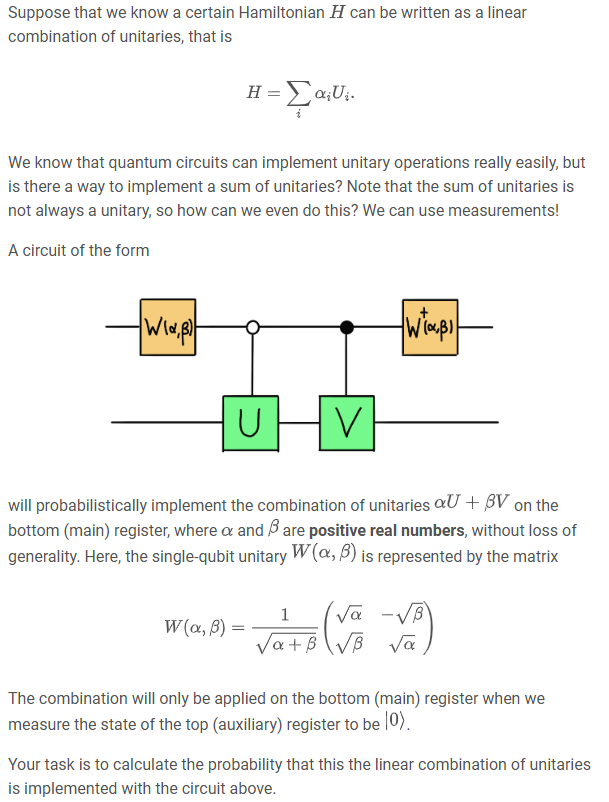

Below is the circuit analysis showing that if we measure the state of the first quibit and this state is |0>, then the state of the second qubit is the state obtained by application of sum of two unitary operations.


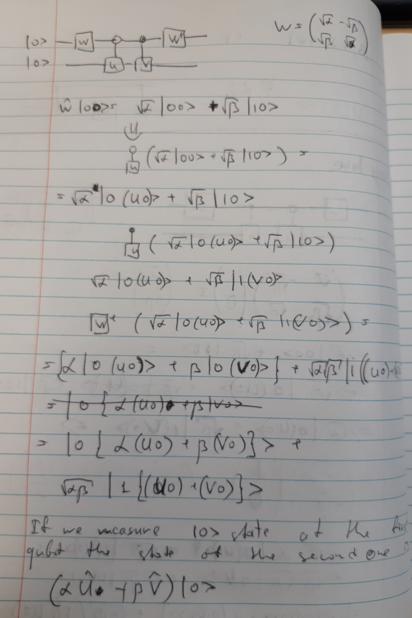

There should be minus in the last term.

## Notes
1. There is only finite probability to get desired state. It is not predefined.
2. The probability depends on alpha and beta and also on the operators U and V themselves.
3. If U and V is the same, then probability is 1. If alpha = 0 or beta = 0, the probability os 1.
4. H and Y gives probability of 0.5 only.


In [1]:
import json
import pennylane as qml
import pennylane.numpy as np


import matplotlib.pyplot as plt

import math

In [47]:
def W(alpha, beta):
    norm = math.sqrt(pow(alpha, 2) + pow(beta, 2))
    return np.array([[alpha/norm, -beta/norm],[beta/norm, alpha/norm]])

In [48]:
W(1,1)

tensor([[ 0.70710678, -0.70710678],
        [ 0.70710678,  0.70710678]], requires_grad=True)

In [49]:
def quantum_circuit_linear_comb(U, V, alpha, beta):
    
    w = W(math.sqrt(alpha), math.sqrt(beta))
    wp = W(math.sqrt(alpha), -math.sqrt(beta))
    qml.QubitUnitary(w,0)
    qml.ControlledQubitUnitary(U, 0, 1, 0)
    qml.ControlledQubitUnitary(V, 0, 1, 1)
    qml.QubitUnitary(wp,0)
    return qml.probs(wires = 0)


In [50]:
U = [[0,1],[1,0]]
V = [[1,0],[0,1]]
quantum_circuit_linear_comb(U,V,1,1)

probs(wires=[0])

C:\Users\Oleg\AppData\Local\Temp\ipykernel_18964\392323430.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


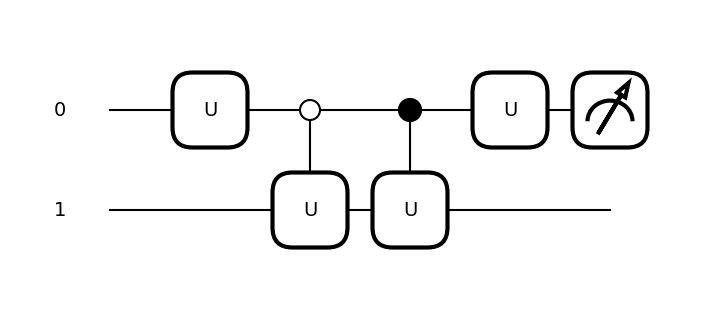

In [51]:
import matplotlib.pyplot as plt
fig, ax = qml.draw_mpl(quantum_circuit_linear_comb, decimals=2)(U,V,1,0)
fig.show()

In [52]:
dev = qml.device('default.qubit', wires = 2)
@qml.qnode(dev)
def linear_combination(U, V, alpha, beta):
    
    w = W(math.sqrt(alpha), math.sqrt(beta))
    wp = W(math.sqrt(alpha), -math.sqrt(beta))
    qml.QubitUnitary(w,0)
    qml.ControlledQubitUnitary(U, 0, 1, 0)
    qml.ControlledQubitUnitary(V, 0, 1, 1)
    qml.QubitUnitary(wp,0)
    return qml.probs(wires = [0])

In [92]:
V = [[ 0.70710678, 0.70710678], [ 0.70710678, 0.70710678]]
U = [[0, 1j], [-1j, 0]]
alpha = 1
beta = 1
res = linear_combination(U, V, alpha, beta)

In [93]:
res

tensor([0.5, 0.5], requires_grad=True)

In [85]:
alpha_norm = alpha / math.sqrt(alpha + beta)
beta_norm = beta / math.sqrt(alpha + beta)
1-2*alpha_norm*beta_norm

2.220446049250313e-16

In [101]:
def run(test_case_input: str) -> str:
    dev = qml.device('default.qubit', wires = 2)
    ins = json.loads(test_case_input)
    output = linear_combination(*ins)[0]

    return str(output)

def check(solution_output: str, expected_output: str) -> None:
    solution_output = json.loads(solution_output)
    expected_output = json.loads(expected_output)
    assert np.allclose(
        solution_output, expected_output, atol=1e-3
    ), "Your circuit doesn't look quite right "

In [102]:
test_input = '[[[ 0.70710678,  0.70710678], [ 0.70710678, -0.70710678]],[[1, 0], [0, -1]], 1, 3]'
run(test_input)

'0.8901650422902463'

In [103]:
test_cases = [
    ('[[[ 0.70710678,  0.70710678], [ 0.70710678, -0.70710678]],[[1, 0], [0, -1]], 1, 3]', '0.8901650422902458')
]

In [104]:
for i, (input_, expected_output) in enumerate(test_cases):
    print(f"Running test case {i} with input '{input_}'...")

    try:
        output = run(input_)

    except Exception as exc:
        print(f"Runtime Error. {exc}")

    else:
        if message := check(output, expected_output):
            print(f"Wrong Answer. Have: '{output}'. Want: '{expected_output}'.")

        else:
            print("Correct!")

Running test case 0 with input '[[[ 0.70710678,  0.70710678], [ 0.70710678, -0.70710678]],[[1, 0], [0, -1]], 1, 3]'...
Correct!
